## PADL Practical: Word2vec embeddings

In [318]:
# Demonstrating word2vec on toy data
import nltk

nltk.download("punkt")

[nltk_data] Downloading package punkt to /Users/ivanbar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [319]:
import matplotlib.pyplot as plt
import numpy as np
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Toy datasets
sentences0 = [
    "My husky bit me",
    "My husky pulls the sleigh",
    "My dog bit the postman",
    "I ate a pizza with olives",
    "I ate a sandwich with cheese",
    "You ate a hotdog with ketchup",
    "You ate a toast with cheese",
]

sentences1 = [
    "You know Dasher and Dancer and Prancer and Vixen Comet and Cupid and Donner and Blitzen, but do you recall the most famous reindeer of all?",
    "Rudolph the Red-Nosed Reindeer Had a very shiny nose And if you ever saw it, You would even say it glows.",
    "All of the other reindeer Used to laugh and call him names, They never let poor Rudolph Join in any reindeer games.",
    "Then one foggy Christmas Eve Santa came to say: Rudolph, with your nose so bright Will you not guide my sleigh tonight?",
    "Then how the reindeer loved him, As they shouted out with glee: Rudolph the Red-Nosed Reindeer, You will go down in history!",
]


sentences2 = [
    "The itsy bitsy spider went up the water spout.",
    "Down came the rain, and washed the spider out.",
    "Out came the sun, and dried up all the rain.",
    "So, the itsy bitsy spider went up the spout again.",
    "The itsy bitsy spider went up the water spout.",
    "Down came the rain, and washed the spider out.",
    "Out came the sun, and dried up all the rain.",
    "So, the itsy bitsy spider went up the spout again.",
]

sentences = sentences0  # + sentences1 + sentences2

# Tokenize sentences
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

# Number of dimensions for the Word2vec embeddings
v_size = 5

# Window size for the Word2vec training
w_size = 2

# Train Word2Vec model (check the Gensim library for more information)
# https://radimrehurek.com/gensim/auto_examples/index.html
model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=v_size,
    window=w_size,
    min_count=1,
    workers=4,
)

# Access embeddings: they are stored as KeyedVectors
word_embeddings = model.wv

**Produce the scatterplot of the first 2 components of the word2vec embeddings**

In [320]:
coordX = []
coordY = []
label = []
for key in word_embeddings.index_to_key:
    coordX.append(word_embeddings[key][0])
    coordY.append(word_embeddings[key][1])
    label.append(key)
    print(word_embeddings[key])

[-0.01074156  0.00479501  0.10209853  0.1802401  -0.18604216]
[-0.14230292  0.12915774  0.17945415 -0.1003276  -0.07522114]
[ 0.14775015 -0.0307472  -0.09078695  0.13107342 -0.09697671]
[-0.03632035  0.0575316   0.01983747 -0.1657043  -0.18897636]
[0.14623532 0.10140524 0.13515386 0.01525731 0.12701781]
[-0.06810732 -0.01892803  0.11537147 -0.15043275 -0.07872207]
[-0.15009777 -0.01862722  0.19068879 -0.14626302 -0.04653114]
[-0.03871727  0.1615674  -0.11867507  0.00092859 -0.09505987]
[-0.19205576  0.10014941 -0.17515406 -0.087829   -0.00065337]
[-0.00588825 -0.15326211  0.19226861  0.09964839  0.18469404]
[-0.16315834  0.08991597 -0.08274152  0.01649072  0.16997239]
[-0.08924353  0.09035001 -0.1357392  -0.07096978  0.18797016]
[-0.03153058  0.00641141 -0.08279629 -0.15363108 -0.03016406]
[ 0.04945128 -0.01783804  0.11071096 -0.05480479  0.04518782]
[ 0.10908776  0.16695182 -0.02906431 -0.18415247  0.08743969]
[ 0.01146551  0.14882262 -0.01623982 -0.05273948 -0.1750573 ]
[-0.01713114 

In [321]:
all_coords = np.array([word_embeddings[key] for key in word_embeddings.index_to_key])

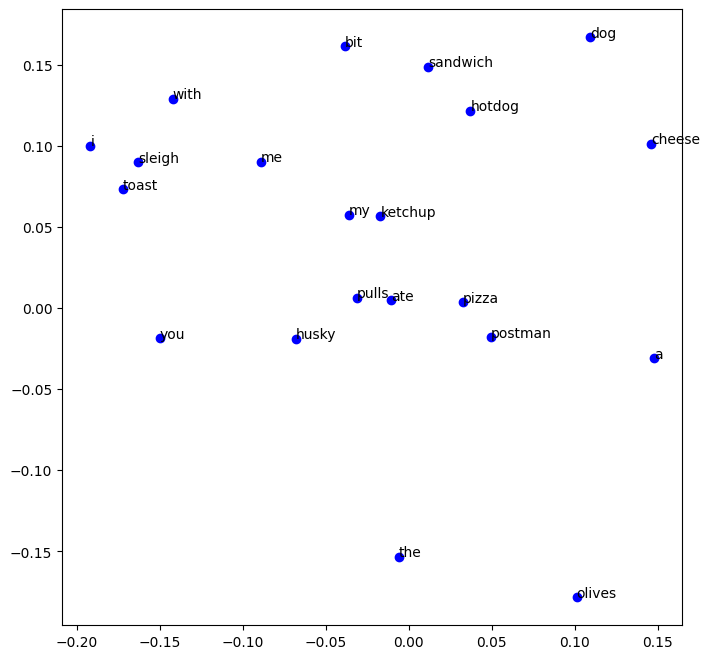

In [322]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(coordX, coordY, color="blue")

for i, txt in enumerate(label):
    ax.annotate(txt, (coordX[i], coordY[i]))

**Test if the Word2vec features are correlated or orthogonal to each other**

In [323]:
from scipy.stats import pearsonr

for i in range(4):
    for j in range(4):
        if i != j and i < j:
            print(
                f"Correlation between component {i} and component {j} is {pearsonr(all_coords[:, i], all_coords[:, j]).statistic}"
            )

            print(
                f"Dot product of component {i} and component {j} is {all_coords[:, i] @ all_coords[:, j]}"
            )

Correlation between component 0 and component 1 is -0.21307295519793717
Dot product of component 0 and component 1 is -0.061654623597860336
Correlation between component 0 and component 2 is -0.0680514212369182
Dot product of component 0 and component 2 is -0.025319062173366547
Correlation between component 0 and component 3 is 0.17303377419674967
Dot product of component 0 and component 3 is 0.05092012509703636
Correlation between component 1 and component 2 is -0.2103888701733461
Dot product of component 1 and component 2 is -0.032682839781045914
Correlation between component 1 and component 3 is -0.2847752559791459
Dot product of component 1 and component 3 is -0.08034982532262802
Correlation between component 2 and component 3 is 0.13841767596511892
Dot product of component 2 and component 3 is 0.02847725711762905


**Apply PCA to the word embeddings, and plot the PC1 vs PC2 scatterplot (with words as labels).**




In [324]:
# Separate the words (as 'labels') from the embeddings (stored in X)
label = []
X = []
for i, key in enumerate(word_embeddings.index_to_key):
    label.append(key)
    X.append(word_embeddings[key])

np.reshape(X, (-1, v_size))

array([[-0.01074156,  0.00479501,  0.10209853,  0.1802401 , -0.18604216],
       [-0.14230292,  0.12915774,  0.17945415, -0.1003276 , -0.07522114],
       [ 0.14775015, -0.0307472 , -0.09078695,  0.13107342, -0.09697671],
       [-0.03632035,  0.0575316 ,  0.01983747, -0.1657043 , -0.18897636],
       [ 0.14623532,  0.10140524,  0.13515386,  0.01525731,  0.12701781],
       [-0.06810732, -0.01892803,  0.11537147, -0.15043275, -0.07872207],
       [-0.15009777, -0.01862722,  0.19068879, -0.14626302, -0.04653114],
       [-0.03871727,  0.1615674 , -0.11867507,  0.00092859, -0.09505987],
       [-0.19205576,  0.10014941, -0.17515406, -0.087829  , -0.00065337],
       [-0.00588825, -0.15326211,  0.19226861,  0.09964839,  0.18469404],
       [-0.16315834,  0.08991597, -0.08274152,  0.01649072,  0.16997239],
       [-0.08924353,  0.09035001, -0.1357392 , -0.07096978,  0.18797016],
       [-0.03153058,  0.00641141, -0.08279629, -0.15363108, -0.03016406],
       [ 0.04945128, -0.01783804,  0.1

In [325]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

X_scaled = scale(X)
pca = PCA()
X_transformed = pca.fit_transform(X_scaled)
X_transformed

array([[ 1.19755191, -1.52033716,  1.14746268,  1.24448193, -0.24240514],
       [-1.23849191, -1.72941213, -0.5115957 , -0.2156782 ,  0.56459271],
       [ 1.52196577,  0.65993074,  1.93637561,  0.62698502, -0.52594835],
       [-1.25102225, -0.82057868,  0.89393397, -0.88583015, -0.61965374],
       [ 0.96619838,  0.37204083,  0.42217565, -0.4640673 ,  1.90558212],
       [-0.34465309, -1.10476376, -0.18261485, -1.22169996, -0.60628097],
       [-0.41395908, -1.73860111, -1.01763052, -1.10013001, -0.50465116],
       [-1.27731383,  0.34461021,  0.94629963,  1.06851184,  0.00500246],
       [-1.89151181,  0.57081653, -0.6419236 ,  0.83810926, -1.09110073],
       [ 2.7791379 , -0.48446423, -1.30498542, -0.34522368, -0.1149511 ],
       [-0.6345422 ,  0.74952745, -1.45103356,  1.17145721, -0.11227817],
       [-0.88620871,  1.49670674, -1.05697253,  0.36969828, -0.08924855],
       [-0.77616436,  0.47616155,  0.18283787, -0.80026081, -0.96856259],
       [ 0.82655531, -0.18625439,  0.0

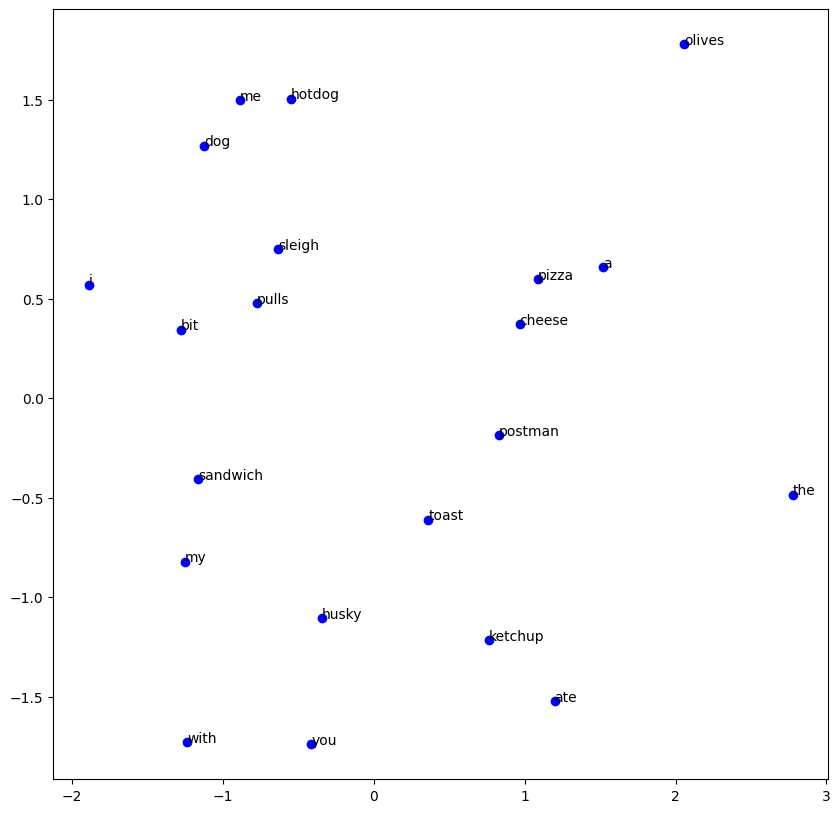

In [326]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], color="blue")

for i, txt in enumerate(label):
    ax.text(X_transformed[i, 0], X_transformed[i, 1], txt)

**Experiment** with (1) the choice of dataset (by adding and editing sentences), and with (2) different sizes for the word embedding vectors (vector_size) and (3) the window used to generate the embeddings, and study how they affect the PC scatterplot.



*   Can you find a setup that brings closer words that are close in meaning?
*   Can you find a setup that brings closer words with similar syntactic role, e.g. prepositions (on/at/under/near...)?

